# Partenaires de production

## Pour un spectacleId voir les coproductions

In [1]:
#pour un spectacle voir les coproductions
#https://www.lesarchivesduspectacle.net/?IDX_Spectacle=90517#spectacle-partenaires-de-production
#Perchée dans les arbres 8 coproductions 

import urllib.request
import re
import pandas as pd
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup
#spectacleId="34525"
spectacleId="36956"
#spectacleId="90517"
# specify which URL/web page we are going to be scraping
url = "https://www.lesarchivesduspectacle.net/?IDX_Spectacle=" + spectacleId +"#spectacle-partenaires-de-production"
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")
#the div where the information is
#the div where the information is
table = soup.find('table', class_='f-spectacle__production-bis') 
# Down below we'll add our inmates to this list
inmates_list = []

# BeautifulSoup provides nice ways to access the data in the parsed
# page. Here, we'll use the select method and pass it a CSS style
# selector to grab all the rows in the table (the rows contain the 
# inmate names and ages).

for table_row in table.find_all('tr'):
    # Each tr (table row) has three td HTML elements (most people 
    # call these table cels) in it (first name, last name, and age)
    cells = table_row.findAll('td')
    # Our table has one exception -- a row without any cells.
    # Let's handle that special case here by making sure we
    # have more than zero cells before processing the cells
    if len(cells) > 0:
        organism = cells[1].text.strip()
        organism_element = cells[1].find('a',class_='c_Organisme b')
        organismId = organism_element['href'].replace("?IDX_Organisme=","")
        type_aide = cells[0].text.strip()
        if(type_aide != ''):
            type_aide_master = type_aide
        
        else:
            type_aide = type_aide_master
        inmate = {'performanceId': spectacleId,'type_aide': type_aide,'organism': organism,'organismId': organismId}
        inmates_list.append(inmate)

df = pd.DataFrame(inmates_list)
df


,performanceId,type_aide,organism,organismId
0,36956,Coproduction,Théâtre National de Chaillot (Paris),585
1,36956,Coproduction,HAU Theater Hebbel am Ufer (Berlin),206
2,36956,Coproduction,Grand Théâtre de la Ville de Luxembourg (Luxe...,383
3,36956,Coproduction,La Rose des Vents (Villeneuve-d'Ascq),141
4,36956,Coproduction,Centro Cultural Vila Flor (Guimarães),12754
5,36956,Diffusion,Frans Brood Productions (Gand),4312


## Fonction qui retourne les types d'aide 

In [5]:
#function return dataframe with type_aide and organism
import urllib.request
import re
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup
import pandas as pd
import socket

def import_df_type_production(spectacleId,saison):
    # specify which URL/web page we are going to be scraping
    url = "https://www.lesarchivesduspectacle.net/?IDX_Spectacle=" + spectacleId +"#spectacle-partenaires-de-production"
    try:
        page = urllib.request.urlopen(url)
        # parse the HTML from our URL into the BeautifulSoup parse tree format
        soup = BeautifulSoup(page, "lxml")
        table = soup.find('table', class_='f-spectacle__production-bis') 
        # Down below we'll add our inmates to this list
        inmates_list = []
        if table is not None:
            for table_row in table.find_all('tr'):
                if table_row is not None:
                    cells = table_row.findAll('td')
                    if len(cells) > 0:
                        organism = cells[1].text.strip()
                        organism_element = cells[1].find('a',class_='c_Organisme b')
                        organismId = organism_element['href'].replace("?IDX_Organisme=","")
                        type_aide = cells[0].text.strip()
                        if(type_aide != ''):
                            type_aide_master = type_aide 
                        else:
                            type_aide = type_aide_master
                        inmate = {'performanceId': spectacleId,'type_aide': type_aide,'organism': organism,'organismId': organismId,'saison':saison}
                        inmates_list.append(inmate)
                    else:
                        inmate = {'performanceId': spectacleId,'type_aide': '','organism': '','organismId': '','saison':saison}
                        inmates_list.append(inmate) 
            df = pd.DataFrame(inmates_list)
            return df
        else:
            inmate = {'performanceId': spectacleId,'type_aide': '','organism': '','organismId': '','saison':saison}
            inmates_list.append(inmate)
            df = pd.DataFrame(inmates_list)
            return df
    except urllib.error.URLError as e:
        print(e.reason + "for spectacleId "  + spectacleId + " saison " + saison)
    except socket.timeout as e: # <-------- this block here
        print("We timed out")

## Génération des types d'aide pour un organisme donné

### Arsenal

In [13]:
#Pour les spectacles à l'Arsenal voir les types d'aide
# ORGANISM ID DE L'ETUDE
# 439 Arsenal
# 699 CCAM [Centre culturel André Malraux] - Scène Nationale de Vandoeuvre-lès-Nancy
# 383 Grand théâtre du Luxembourg
# 1914 Carreau forbach 
import time
from datetime import datetime
import pandas as pd
organismId="439"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_"+ organismId + "_danse.csv"
df_organism = pd.read_csv(csv_file_path)
df = pd.DataFrame(columns=['performanceId','type_aide','organism','organismId'])                        
print("start",datetime.now()) 
for row in df_organism.itertuples():
    if (row.performanceId!=0):
        #call the function to have the type_aide and orgnaism
        try:
            df=df.append(import_df_type_production(str(row.performanceId),row.year),sort=False,ignore_index=True)
        except Exception as err:
            continue
df.to_csv(os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_production_danse.csv")

print("finish",datetime.now())

start 2020-08-23 13:21:36.771744
finish 2020-08-23 13:22:32.446713


### CCAM

In [6]:
import time
import os
from datetime import datetime
import pandas as pd
organismId="699"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_"+ organismId + "_danse.csv"
df_organism = pd.read_csv(csv_file_path)
df = pd.DataFrame(columns=['performanceId','type_aide','organism','organismId'])                        
print("start",datetime.now()) 
for row in df_organism.itertuples():
    if (row.performanceId!=0):
        #call the function to have the type_aide and orgnaism
        try:
            df=df.append(import_df_type_production(str(row.performanceId),row.year),sort=False,ignore_index=True)
        except Exception as err:
            continue
df.to_csv(os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_production_danse.csv")

print("finish",datetime.now())


start 2020-08-27 18:50:56.037006
finish 2020-08-27 18:51:34.130561


### Carreau

In [ ]:
import time
import os
from datetime import datetime
import pandas as pd
organismId="1914"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_"+ organismId + "_danse.csv"
df_organism = pd.read_csv(csv_file_path)
df = pd.DataFrame(columns=['performanceId','type_aide','organism','organismId'])                        
print("start",datetime.now()) 
for row in df_organism.itertuples():
    if (row.performanceId!=0):
        #call the function to have the type_aide and orgnaism
        try:
            df=df.append(import_df_type_production(str(row.performanceId),row.year),sort=False,ignore_index=True)
        except Exception as err:
            continue
df.to_csv(os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_production_danse.csv")

print("finish",datetime.now())

### Grand théâtre

In [63]:
import time
import os
from datetime import datetime
import pandas as pd
organismId="383"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_"+ organismId + "_danse.csv"
df_organism = pd.read_csv(csv_file_path)
df = pd.DataFrame(columns=['performanceId','type_aide','organism','organismId'])                        
print("start",datetime.now()) 
for row in df_organism.itertuples():
    if (row.performanceId!=0):
        #call the function to have the type_aide and orgnaism
        try:
            df=df.append(import_df_type_production(str(row.performanceId),row.year),sort=False,ignore_index=True)
        except Exception as err:
            continue
df.to_csv(os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_production_danse.csv")

print("finish",datetime.now())

start 2020-08-27 20:54:55.664130
finish 2020-08-27 20:56:59.869368


### Evolution des coproductions par organisme

#### Grand théâtre

In [2]:
import time
from datetime import datetime
import pandas as pd
import os
organismId=383
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + str(organismId) +"_type_production_danse.csv"
df_type_production_lux = pd.read_csv(csv_file_path)

df_type_production_lux = df_type_production_lux[df_type_production_lux['type_aide'] == 'Coproduction']

#where coproduction est Lux
df_type_production_lux = df_type_production_lux[df_type_production_lux['organismId'] == organismId]

csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ str(organismId) + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_copro_lux = df_danse[df_danse['performanceId'].isin(df_type_production_lux['performanceId'])]
#df_copro_lux =df_copro_lux.groupby(["year"]).performanceId.count()

df_copro_lux

#moyenne_copro = df_copro_lux.performanceId.count().mean() / 10
#moyenne_copro

,Unnamed: 0,performanceId,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse,Unnamed: 0.1,organism_id,year,performance,author,authordId,label,period,occurency,place
0,0,29600,Danse,1 heure 15,France,Création le,2010-08-26,?IDX_Organisme=18808&Annee=2010,Festival d'opéra de Vérone,Création le,0,383,2010,Roméo et Juliette,Thierry Malandain,2674,\nRoméo et Juliette chorégraphie Thierry Mala...,\n15/10 → 16/10\n,[2 rep.],NaN
2,11,38364,Danse,NaN,Belgique,NaN,NaN,NaN,NaN,Création 2011,11,383,2011,To Intimate,Mark Lorimer,922,\nTo Intimate chorégraphie Mark Lorimer…\n\n ...,\n07/12\n,[1 rep.],(Studio)
15,47,28811,Danse,NaN,France,Création le,2010-09-17,?IDX_Organisme=1342&Annee=2010,Théâtre de la Croix-Rousse,Création le,47,383,2011,Songook Yaakaar,Germaine Acogny,16557,\nSongook Yaakaar chorégraphie Germaine Acogn...,\n08/06\n,[1 rep.],(Studio)
22,56,36956,Danse,NaN,Belgique,Première en France le,2012-04-04,?IDX_Organisme=585&Saison=2011,Théâtre National de Chaillot,Création 2011,60,383,2012,Au-delà,Koen Augustijnen,433,\nAu-delà chorégraphie Koen Augustijnen\n,\n16/10 → 17/10\n,[2 rep.],(Studio)
23,57,28852,Danse,NaN,France,Création le,2009-07-29,?IDX_Organisme=18239&Annee=2009,PROArt Festival,Création le,61,383,2012,Island of No Memories,Kaori Ito,6904,\nIsland of No Memories chorégraphie Kaori Ito\n,\n23/10\n,[1 rep.],(Studio)
25,59,37136,Danse,NaN,Royaume-Uni/France,Création en,2011-09,?IDX_Organisme=9585&Saison=2011,Curve Theatre,Création en,63,383,2012,Desh,Akram Khan,4674,\nDesh chorégraphie Akram Khan\n,\n14/11\n,[1 rep.],(Grande Salle)
31,73,45893,Danse,NaN,Australie,Création le,2012-02-24,?IDX_Organisme=20122&Saison=2011,Adelaide Festival Centre,Création le,77,383,2012,Proximity,Garry Stewart,19092,\nProximity chorégraphie Garry Stewart concep...,\n08/01 → 09/01\n,[2 rep.],(Grande Salle)
33,81,37346,Théâtre – Danse – Arts numériques – à partir d...,1 heure 20,Belgique,Création le,2011-03-20,?IDX_Organisme=9966&Annee=2011,Le Manège de Mons,Création le,85,383,2012,Kiss & Cry,Thomas Gunzig,78223,\nKiss & Cry de Thomas Gunzig mise en scène Ja...,\n02/02\n,[1 rep.],(Grande Salle)
44,110,50262,Danse,1 heure 40,France,Création le,2013-04-29,?IDX_Organisme=8748&Saison=2012,Grand Théâtre de Provence,Création le,114,383,2013,Les Nuits,Angelin Preljocaj,4040,\nLes Nuits chorégraphie Angelin Preljocaj\n,\n23/09 → 24/09\n,[2 rep.],(Grande Salle)
87,219,56242,Danse,1 heure 30,Belgique,Création le,2014-01-10,?IDX_Organisme=1643&Saison=2013,deSingel,Création le,228,383,2014,Genesis,Sidi Larbi Cherkaoui,4676,\nGenesis chorégraphie Sidi Larbi Cherkaoui\n,\n04/06 → 05/06\n,[2 rep.],(Grande Salle)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1237661d0>,
      dtype=object)

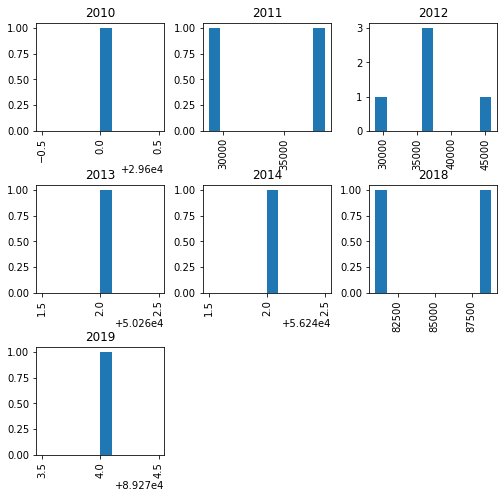

#### Arsenal

In [20]:
import time
from datetime import datetime
import pandas as pd
import os
organismId=439
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + str(organismId) +"_type_production_danse.csv"
df_type_production_arsenal = pd.read_csv(csv_file_path)

df_type_production_arsenal = df_type_production_arsenal[df_type_production_arsenal['type_aide'] == 'Coproduction']

#where coproduction est Lux
df_type_production_arsenal = df_type_production_arsenal[df_type_production_arsenal['organismId'] == organismId]

csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ str(organismId) + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_copro_arsenal = df_danse[df_danse['performanceId'].isin(df_type_production_arsenal['performanceId'])]
#df_copro_arsenal=df_copro_arsenal.groupby(["author"]).performanceId.count().sort_values(ascending=False) 
#df_copro_arsenal=df_copro_arsenal.groupby(["year"]).performanceId.count()
#moyenne_copro = df_copro_arsenal.performanceId.count().mean() / 10
#moyenne_copro 

df_copro_arsenal

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,organism_id,year,performance,performanceId,author,authordId,label,...,occurency,place,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse
9,16,16,18,439,2010,Pacifique,28494,Nasser Martin-Gousset,5024,\nPacifique chorégraphie Nasser Martin-Gousset\n,...,[1 rep.],(Grande salle),Danse,NaN,France,Création le,2010-09-20,?IDX_Organisme=1342&Annee=2010,Studio 24,Création le
12,21,21,23,439,2011,Os,38625,Jacky Achar,85158,\nOs chorégraphie Jacky Achar\n,...,[1 rep.],(Grande salle),Danse,NaN,France,Création le,2011-12-08,?IDX_Organisme=439&Saison=2011,L'Arsenal de Metz,Création le
14,24,24,26,439,2011,Pléiades,34366,Alban Richard,5678,\nPléiades chorégraphie Alban Richard concept...,...,[1 rep.],(Grande salle),Danse – Musique,1 heure,France,Création le,2011-06-24,?IDX_Organisme=339&Annee=2011,Agora,Création le
18,29,29,31,439,2011,Le Bénéfice du doute,37816,Christian Rizzo,7929,\nLe Bénéfice du doute chorégraphie Christian...,...,[1 rep.],(Grande salle),Danse,NaN,France,NaN,NaN,NaN,NaN,Création 2011
19,30,30,34,439,2011,Entre deux,38626,Abdou N'Gom,31813,\nEntre deux chorégraphie Abdou N'Gom\n,...,[1 rep.],(Studio du Gouverneur),Danse – à partir de 9 ans,40 minutes,France,NaN,NaN,NaN,NaN,Création 2011
28,44,44,48,439,2012,Revolve,46998,Emmanuelle Vo-Dinh,8590,\nRevolve chorégraphie Emmanuelle Vo-Dinh con...,...,[1 rep.],(Grande salle),Danse,NaN,France,NaN,NaN,NaN,NaN,Création 2012
29,45,45,49,439,2012,Un œil sur la chose,29203,Françoise Klein,22788,\nUn œil sur la chose chorégraphie Françoise ...,...,[1 rep.],(Grande salle),Danse,NaN,France,Création le,2011-02-02,?IDX_Organisme=699&Saison=2010,CCAM,Création le
30,46,46,50,439,2012,Encore,46999,Aurore Gruel,3647,\nEncore chorégraphie Aurore Gruel conception...,...,[1 rep.],(Grande salle),Danse,NaN,France,NaN,NaN,NaN,NaN,Création 2013
32,48,48,52,439,2012,De pictura,47000,Aurélie Gandit,57989,\nDe pictura chorégraphie Aurélie Gandit conc...,...,[2 rep. + 1 scol.],(Studio du Gouverneur),Danse,NaN,France,Création le,2013-03-14,?IDX_Organisme=28220&Annee=2013,ACB,Création le
34,51,51,58,439,2013,Shadoz,52149,Isabelle Renaud,109922,\nShadoz chorégraphie Isabelle Renaud\n,...,[1 rep. + 2 scol.],(Salle de l'Esplanade),Danse – à partir de 6 ans,NaN,France,Création le,2013-10-09,?IDX_Organisme=31575&Annee=2013,L'Arsenal de Metz,Création le


In [23]:
csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ str(organismId) + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_copro_arsenal = df_danse[df_danse['authordId'].isin([8590,7929])]
df_copro_arsenal

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,organism_id,year,performance,performanceId,author,authordId,label,...,occurency,place,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse
18,29,29,31,439,2011,Le Bénéfice du doute,37816,Christian Rizzo,7929,\nLe Bénéfice du doute chorégraphie Christian...,...,[1 rep.],(Grande salle),Danse,NaN,France,NaN,NaN,NaN,NaN,Création 2011
21,33,33,37,439,2011,Rainbow,21963,Emmanuelle Vo-Dinh,8590,\nRainbow chorégraphie Emmanuelle Vo-Dinh…\n\...,...,[3 rep.],(Studio du Gouverneur),Danse,NaN,France,Création le,2010-05-19,?IDX_Organisme=442&Saison=2009,Forum de Flers,Création le
28,44,44,48,439,2012,Revolve,46998,Emmanuelle Vo-Dinh,8590,\nRevolve chorégraphie Emmanuelle Vo-Dinh con...,...,[1 rep.],(Grande salle),Danse,NaN,France,NaN,NaN,NaN,NaN,Création 2012
52,75,75,85,439,2014,D'après une histoire vraie,50529,Christian Rizzo,7929,\nD'après une histoire vraie chorégraphie Chr...,...,[1 rep.],(Grande salle),Danse – à partir de 11 ans,1 heure 10,France,Création le,2013-07-07,?IDX_Organisme=2776&Annee=2013,Gymnase du Lycée Aubanel,Création le
93,138,138,164,439,2018,Ad noctum,66093,Christian Rizzo,7929,\nAd noctum chorégraphie Christian Rizzo\n,...,[1 rep.],(Grande salle),Danse,55 minutes,France,Création le,2015-11-04,?IDX_Organisme=1276&Saison=2015,TU-Nantes,Création le
99,149,149,175,439,2018,Belles et bois,74725,Emmanuelle Vo-Dinh,8590,\nBelles et bois conception Emmanuelle Vo-Din...,...,[1 rep. + 2 scol.],(Salle de l'Esplanade),Danse – à partir de 7 ans,45 minutes,France,Création le,2016-12-13,?IDX_Organisme=1401&Saison=2016,Théâtre Le Passage,Création le


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
fig, ax = plt.subplots(figsize=(8,6))


ax= df_copro_arsenal.plot.pie(labeldistance=1.10)
ax.set_title("Chorégraphes ayant bénéficié de coproduction par L'Arsenal")
ax.set_ylabel('')


fig = ax.get_figure()
fig.savefig(os.getcwd() + "/data/arsenal_copro_danse.png")
plt.clf()

<Figure size 576x432 with 0 Axes>

##### Type d'aide filtre danse

In [81]:
import time
from datetime import datetime
import pandas as pd
import os
# ORGANISM ID DE L'ETUDE
# 439 Arsenal
# 699 CCAM [Centre culturel André Malraux] - Scène Nationale de Vandoeuvre-lès-Nancy
# 383 Grand théâtre du Luxembourg
# 1914 Carreau forbach  

# Arsenal 439
organismId=699
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + str(organismId) +"_type_production_danse.csv"
df_type_production_arsenal = pd.read_csv(csv_file_path)

#df_type_production_arsenal = df_type_production_arsenal[df_type_production_arsenal['type_aide'] == 'Résidence']

#where coproduction est Lux
#df_type_production_arsenal = df_type_production_arsenal[df_type_production_arsenal['organismId'] == organismId]

csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ str(organismId) + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_type_aide_arsenal = df_type_production_arsenal[df_type_production_arsenal['performanceId'].isin(df_danse['performanceId'])]
#df_copro_arsenal=df_copro_arsenal.groupby(["year"]).performanceId.count()
df_type_aide_arsenal = df_type_aide_arsenal[df_type_aide_arsenal['organismId'] == organismId]
#df_type_aide_arsenal = df_type_aide_arsenal[df_type_aide_arsenal['type_aide'] == 'Résidence']
#len(df_type_aide_arsenal)

#df_type_aide_arsenal
df_type_aide_arsenal.type_aide.value_counts()


Coproduction    35
Soutien          2
Partenariat      1
Name: type_aide, dtype: int64

In [7]:
len(df_copro_arsenal)

21

In [4]:

filterCommonPoleSudManege = [22187,86085,28889,50529,51077,66193]
df_copro_arsenal = df_copro_arsenal[df_copro_arsenal.performanceId.isin(filterCommonPoleSudManege)]
df_copro_arsenal

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,organism_id,year,performance,performanceId,author,authordId,label,...,occurency,place,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse
98,148,148,174,439,2018,Requiem pour L.,86085,Alain Platel,14757,\nRequiem pour L. mise en scène Alain Platel\n,...,[2 rep.],(Grande salle),Théâtre – Danse – Musique – à partir de 14 ans,1 heure 40,Belgique,Première en France le,2018-07-06,?IDX_Organisme=436&Annee=2018,Le Silo,Création le


#### CCAM

In [45]:
import time
from datetime import datetime
import pandas as pd
import os
organismId=699
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + str(organismId) +"_type_production_danse.csv"
df_type_production_ccam = pd.read_csv(csv_file_path)

df_type_production_ccam = df_type_production_ccam[df_type_production_ccam['type_aide'] == 'Coproduction']


df_type_production_ccam = df_type_production_ccam[df_type_production_ccam['organismId'] == organismId]

csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ str(organismId) + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_copro_ccam = df_danse[df_danse['performanceId'].isin(df_type_production_ccam['performanceId'])]
#df_copro_ccam=df_copro_ccam.groupby(["year"]).performanceId.count()
moyenne_copro = df_copro_ccam.performanceId.count().mean() / 10
moyenne_copro 

0.0

## Detail par année pour voir le type de spectacle

In [30]:
import time
from datetime import datetime
import pandas as pd
import os
organismId=699
#organismId=439
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + str(organismId) +"_type_production_danse.csv"
df_copro_ccam = pd.read_csv(csv_file_path)
df_copro_ccam = df_copro_ccam[df_copro_ccam['type_aide'] == 'Coproduction']
df_copro_ccam = df_copro_ccam[df_copro_ccam['organismId'] == organismId]

### Faut peut-être regarder du côté des créations

In [31]:
csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ str(organismId) + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_danse_creation_ccam= df_danse[df_danse['organismeName'] == 'CCAM']
len(df_danse_creation_ccam)

10

In [ ]:
#### Les créations qui ne sont pas des coproductions?

In [32]:
df_copro_ccam_creation = df_danse_creation_ccam[~df_danse_creation_ccam['performanceId'].isin(df_copro_ccam['performanceId'])]
df_copro_ccam_creation

,Unnamed: 0,performanceId,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse,...,Unnamed: 0.1,organism_id,year,performance,author,authordId,label,period,occurency,place
35,119,53080,Danse,NaN,France,Création le,2013-11-09,?IDX_Organisme=31575&Annee=2013,CCAM,Création le,...,85,699,2013,Nine Days,Nathalie Zanini,164860,\nNine Days conception Nathalie Zanini\n,\n09/11 → 17/11\n,[9 rep.],NaN
83,263,89368,Danse – à partir de 12 ans,1 heure,France,Création le,2018-12-19,?IDX_Organisme=699&Saison=2018,CCAM,Création le,...,278,699,2018,Laisse le vent du soir décider,Étienne Fanteguzzi,16533,\nLaisse le vent du soir décider chorégraphie...,\n19/12 → 20/12\n,[1 rep. + 1 scol.],NaN


#### Carreau

In [40]:
import time
from datetime import datetime
import pandas as pd
organismId=1914
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + str(organismId) +"_type_production_danse.csv"
df_type_production_carreau = pd.read_csv(csv_file_path)

df_type_production_carreau = df_type_production_carreau[df_type_production_carreau['type_aide'] == 'Coproduction']

df_type_production_carreau
df_type_production_carreau = df_type_production_carreau[df_type_production_carreau['organismId'] == organismId]

csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ str(organismId) + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_copro_carreau = df_danse[df_danse['performanceId'].isin(df_type_production_carreau['performanceId'])]
#df_copro_carreau=df_copro_carreau.groupby(["year"]).performanceId.count()
#df_copro_carreau
moyenne_copro = df_copro_carreau.performanceId.count().mean() / 10
moyenne_copro

0.2

In [85]:
import time
from datetime import datetime
import pandas as pd
organismId=439
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + str(organismId) +"_type_production_danse.csv"
df_type_production_carreau = pd.read_csv(csv_file_path)

df_type_production_carreau = df_type_production_carreau[df_type_production_carreau['type_aide'] == 'Résidence']

df_type_production_carreau

,Unnamed: 0,performanceId,type_aide,organism,organismId,saison
291,291,50529,Résidence,Ballet du Nord (Roubaix),20361.0,2014.0
336,336,65139,Résidence,Ballet de Lorraine (Nancy),1798.0,2015.0
504,504,82658,Résidence,L'Arsenal de Metz (Metz),439.0,2017.0
537,537,81168,Résidence,Teatros del Canal (Madrid),13504.0,2017.0
538,538,81168,Résidence,Le CND (Pantin),74.0,2017.0
539,539,81168,Résidence,La Ménagerie de Verre (Paris),1979.0,2017.0
540,540,81168,Résidence,El Garaje,53266.0,2017.0
554,554,73621,Résidence,Ballet de l'Opéra national du Rhin (Mulhouse),6093.0,2017.0
628,628,74725,Résidence,Théâtre Le Passage (Fécamp),1401.0,2018.0
705,705,96786,Résidence,Théâtre des Salins (Martigues),459.0,2019.0


In [33]:
#Coproduction arsenal
#saison
#2010.0    1
#2011.0    6
#2012.0    4
#2013.0    2
#2014.0    4
#2015.0    1
#2016.0    1
#2017.0    3
#2018.0    3



#2010    17
#2011    19
#2012    15
#2013    12
#2014    20
#2015    13
#2016    22
#2017    19
#2018    31
#2019    27
import time
from datetime import datetime
import pandas as pd
csv_file_path = "all_10_years_organism_439_type_production.csv"
df_type_production = pd.read_csv(csv_file_path)
df_type_production.type_aide.value_counts()


Coproduction     646
Soutien          247
Aide              67
Partenariat       23
Résidence         20
Collaboration      8
Participation      4
Diffusion          4
Coréalisation      1
Name: type_aide, dtype: int64

#### Histogramme qui reprend les coproductions

In [ ]:
2010    1
2011    2
2012    5
2013    1
2014    1
2018    2
2019    1

In [46]:
x=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
y_lux=[1,2,5,1,1,0,0,0,2,1]

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))


plt.plot(df_copro_lux,label="Grand théâtre",linestyle='-', marker='o')
plt.plot(df_copro_ccam,label="CCAM",linestyle='-', marker='o')
plt.plot(df_copro_carreau,alpha=0.5, label="Carreau",linestyle='-', marker='o')
plt.plot(df_copro_arsenal,label="Arsenal",linestyle='-', marker='o')


plt.xlabel("Année")
plt.ylabel("Nb coproductions")
plt.title('Nombre de coproductions par an')
plt.legend(loc='upper right')
#plt.legend(["Grand théâtre","CCAM","Carreau","Arsenal"])



fig = ax.get_figure()
fig.savefig(os.getcwd() + "/data/nb_coproduction_structure.png")
plt.clf()

<Figure size 576x432 with 0 Axes>

In [33]:
import time
from datetime import datetime
import pandas as pd
csv_file_path = "all_10_years_organism_439_type_production.csv"
df_type_production = pd.read_csv(csv_file_path)
#where organism is Arsenal
df_type_production = df_type_production[df_type_production['organismId'] == 439.0]
df_type_production.type_aide.value_counts()
#df_type_production.nunique()
#df_type_production 

Coproduction    25
Résidence        1
Partenariat      1
Name: type_aide, dtype: int64

## Coréalisation

In [63]:
import time
from datetime import datetime
import pandas as pd
import os
organismId=439
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + str(organismId) +"_type_production_danse.csv"
df_type_production_arsenal = pd.read_csv(csv_file_path)

df_type_production_arsenal = df_type_production_arsenal[df_type_production_arsenal['type_aide'] == 'Coproduction']

#where coproduction est Lux
#df_type_production_arsenal = df_type_production_arsenal[df_type_production_arsenal['organismId'] == organismId]

csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ str(organismId) + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_copro_arsenal = df_danse[df_danse['performanceId'].isin(df_type_production_arsenal['performanceId'])]
df_copro_arsenal=df_copro_arsenal.groupby(["year"]).performanceId.count()
df_copro_arsenal

year
2010     9
2011    10
2012    10
2013     8
2014    11
2015    10
2016     9
2017     9
2018    14
2019    10
Name: performanceId, dtype: int64

## Moyenne de coproduction par spectacle

In [47]:
import time
from datetime import datetime
import pandas as pd
csv_file_path = "all_10_years_organism_439_type_production.csv"
df_type_production = pd.read_csv(csv_file_path)
#where organism is Arsenal
#df_type_production = df_type_production[df_type_production['organismId'] == 383.0]
#df_type_production.type_aide.value_counts()
#df_type_production.nunique()
#df_type_production.nunique()
#df_type_production.type_aide.value_counts()

#df_type_production.set_index(['performanceId'], drop=True, inplace=True)
#df_type_production.groupby(["type_aide"]).type_aide.count().sort_values(ascending=False)


df_type_production = df_type_production[df_type_production['type_aide'] == 'Coproduction']
#df_type_production.groupby(["performanceId"]).type_aide.count().sort_values(ascending=False)

df_type_production.groupby(["performanceId"]).type_aide.count().mean()
##33 performance en coproduction faite par l'institution passée en paramètre sur 476 performances Luxembourg
## 6 performance en coproduction 192  Arsenal 

#moyenne de coprodcutuion 4.48
#moyenne de coprodcutuion si Arsenael faut selectionner les performanceId si organismId == arsenal
# et ces performznceId les sélectionner dans dataframe origiine et group by 

#df_type_production.nunique()

4.486111111111111

In [57]:
import time
from datetime import datetime
import pandas as pd
csv_file_path = "all_10_years_organism_439_type_production.csv"
df_type_production = pd.read_csv(csv_file_path)
df_type_production[df_type_production['type_aide'].isnull().values].nunique()


Unnamed: 0       38
performanceId    38
type_aide         0
organism          0
organismId        0
saison            9
dtype: int64

## DRAC - Soutien - Aide

### DRAC Arsenal

In [90]:
import time
from datetime import datetime
import pandas as pd
organismId="439"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_production_danse.csv"
df_type_production = pd.read_csv(csv_file_path)

#df_type_production = df_type_production[df_type_production['type_aide'] == 'Soutien']
df_type_production = df_type_production[df_type_production['type_aide'].isin(['Aide','Soutien'])] 


In [91]:
df_soutien_drac=df_type_production[df_type_production['organismId'].isin(['712.0','44731.0'])]
csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ organismId + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_danse_drac_arsenal = df_danse[df_danse['performanceId'].isin(df_soutien_drac['performanceId'])]
df_danse_drac_arsenal

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,organism_id,year,performance,performanceId,author,authordId,label,...,occurency,place,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse
29,45,45,49,439,2012,Un œil sur la chose,29203,Françoise Klein,22788,\nUn œil sur la chose chorégraphie Françoise ...,...,[1 rep.],(Grande salle),Danse,NaN,France,Création le,2011-02-02,?IDX_Organisme=699&Saison=2010,CCAM,Création le
30,46,46,50,439,2012,Encore,46999,Aurore Gruel,3647,\nEncore chorégraphie Aurore Gruel conception...,...,[1 rep.],(Grande salle),Danse,NaN,France,NaN,NaN,NaN,NaN,Création 2013
34,51,51,58,439,2013,Shadoz,52149,Isabelle Renaud,109922,\nShadoz chorégraphie Isabelle Renaud\n,...,[1 rep. + 2 scol.],(Salle de l'Esplanade),Danse – à partir de 6 ans,NaN,France,Création le,2013-10-09,?IDX_Organisme=31575&Annee=2013,L'Arsenal de Metz,Création le
49,70,70,79,439,2014,Sans territoire fixe,59853,Aurore Gruel,3647,\nSans territoire fixe chorégraphie Aurore Gr...,...,[1 rep. + 2 scol.],(Studio du Gouverneur),Danse – Jeune public – à partir de 12 ans,1 heure,France,Création le,2015-01-15,?IDX_Organisme=439&Saison=2014,L'Arsenal de Metz,Création le
57,81,81,93,439,2015,Cease to know or to tell or to see or to be yo...,60050,Aurélie Gandit,57989,\nCease to know or to tell or to see or to be ...,...,[2 rep.],(Studio du Gouverneur),Danse,30 minutes avec entracte,France,Création le,2014-06-24,?IDX_Organisme=36362&Annee=2014,Les Trinitaires,Création le
69,97,97,109,439,2016,Pied de nez,74341,Aurélie Gandit,57989,\nPied de nez chorégraphie Aurélie Gandit con...,...,[1 rep. + 3 scol.],(Studio du Gouverneur),Danse – Arts numériques – à partir de 8 ans,50 minutes,France,Création le,2016-11-05,NaN,NaN,Création le
81,118,118,140,439,2017,Fury,82658,Sarah Baltzinger,183994,\nFury chorégraphie Sarah Baltzinger concepti...,...,[1 rep.],(Grande salle),Danse,NaN,Luxembourg,Création le,2017-11-09,?IDX_Organisme=49942&Annee=2017,L'Arsenal de Metz,Création le
87,129,129,151,439,2017,Exartikulations,82664,Aurore Gruel,3647,\nExartikulations chorégraphie Aurore Gruel\n,...,[1 rep.],La BAM,Danse,40 minutes,France,Création le,2018-02-15,?IDX_Organisme=4171&Annee=2018,Le Cellier,Création le
92,137,137,163,439,2018,Perchée dans les arbres,90517,Aurélie Gandit,57989,\nPerchée dans les arbres chorégraphie Auréli...,...,[2 rep.],(Studio du Gouverneur),Danse,1 heure,France,Création le,2018-10-11,?IDX_Organisme=439&Saison=2018,L'Arsenal de Metz,Création le


In [ ]:
#DRAC Lorraine IDX_Organisme=712
#DRAC Grand Est IDX_Organisme=44731

### DRAC CCAM

In [92]:
import time
from datetime import datetime
import pandas as pd
import os
organismId="699"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_production_danse.csv"
df_type_production = pd.read_csv(csv_file_path)
#df_type_production = df_type_production[df_type_production['type_aide'] == 'Soutien']
df_type_production = df_type_production[df_type_production['type_aide'].isin(['Aide','Soutien'])] 
df_soutien_drac=df_type_production[df_type_production['organismId'].isin(['712.0','44731.0'])]
csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ organismId + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_danse_drac_ccam = df_danse[df_danse['performanceId'].isin(df_soutien_drac['performanceId'])]
df_danse_drac_ccam

,Unnamed: 0,performanceId,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse,...,Unnamed: 0.1,organism_id,year,performance,author,authordId,label,period,occurency,place
7,32,29203,Danse,NaN,France,Création le,2011-02-02,?IDX_Organisme=699&Saison=2010,CCAM,Création le,...,9,699,2010,Un œil sur la chose,Françoise Klein,22788,\nUn œil sur la chose chorégraphie Françoise ...,\n02/02 → 05/02\n,[4 rep.],NaN
20,86,46999,Danse,NaN,France,NaN,NaN,NaN,NaN,Création 2013,...,62,699,2012,Encore,Aurore Gruel,3647,\nEncore chorégraphie Aurore Gruel conception...,\n30/01 → 02/02\n,[4 rep.],NaN
21,87,46999,Danse,NaN,France,NaN,NaN,NaN,NaN,Création 2013,...,92,699,2013,Encore,Aurore Gruel,3647,\nEncore chorégraphie Aurore Gruel conception...,\n27/11\n,[1 rep.],NaN
25,91,47005,Théâtre – Danse,NaN,France,Création le,2013-02-12,?IDX_Organisme=699&Saison=2012,CCAM,Création le,...,64,699,2012,Le Testament de Vanda,Jean-Pierre Siméon,10945,\nLe Testament de Vanda de Jean-Pierre Siméon ...,\n12/02 → 16/02\n,[5 rep.],NaN
37,121,53082,Danse,NaN,France,Création le,2013-11-14,?IDX_Organisme=31575&Annee=2013,CCAM,Création le,...,87,699,2013,Soror,Camille Mutel,60990,\nSoror chorégraphie Camille Mutel\n,\n14/11 → 15/11\n,[20 rep.],NaN
41,145,59853,Danse – Jeune public – à partir de 12 ans,1 heure,France,Création le,2015-01-15,?IDX_Organisme=439&Saison=2014,L'Arsenal de Metz,Création le,...,162,699,2015,Sans territoire fixe,Aurore Gruel,3647,\nSans territoire fixe chorégraphie Aurore Gr...,\n02/10 → 03/10\n,[2 rep.],NaN
52,174,65947,Théâtre – Danse – Musique – à partir de 15 ans,50 minutes,France,Création le,2015-07-04,?IDX_Organisme=5678&Annee=2015,Les Hauts Plateaux,Création le,...,164,699,2015,Contrôle,Gurshad Shaheman,29673,\nContrôle de Gurshad Shaheman… mise en scène ...,\n09/10 → 10/10\n,[2 rep.],NaN
58,184,67051,Danse – à partir de 16 ans,50 minutes,France,Création le,2015-12-02,?IDX_Organisme=31575&Annee=2015,CCAM,Création le,...,172,699,2015,"Go, go, go, said the bird...",Camille Mutel,60990,"\nGo, go, go, said the bird... conception Cam...",\n02/12 → 03/12\n,[2 rep.],NaN
72,239,81720,Danse – à partir de 16 ans,55 minutes,France,NaN,NaN,NaN,NaN,Création 2017,...,243,699,2017,Animaux de béance,Camille Mutel,60990,\nAnimaux de béance chorégraphie Camille Mutel\n,\n06/11 → 07/11\n,[2 rep.],NaN
82,262,89367,Danse,NaN,Espagne/France,Création le,2018-03-05,?IDX_Organisme=1744&Saison=2017,Pôle-Sud,Création le,...,277,699,2018,Carmen/Shakespeare,Olga Mesa,4837,\nCarmen/Shakespeare conception Olga Mesa…\n\...,\n14/12\n,[1 rep.],NaN


In [ ]:
### DRAC Carreau

In [93]:
import time
from datetime import datetime
import pandas as pd
import os
organismId="1914"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_production_danse.csv"
df_type_production = pd.read_csv(csv_file_path)
#df_type_production = df_type_production[df_type_production['type_aide'] == 'Soutien']
df_type_production = df_type_production[df_type_production['type_aide'].isin(['Aide','Soutien'])] 
df_soutien_drac= df_type_production[df_type_production['organismId'].isin(['712.0','44731.0'])]
df_soutien_drac

,Unnamed: 0,performanceId,type_aide,organism,organismId,saison
98,98,37984,Soutien,DRAC Lorraine (Metz),712.0,2011.0
317,317,74341,Soutien,DRAC Lorraine (Metz),712.0,2017.0
325,325,74341,Soutien,DRAC Lorraine (Metz),712.0,2017.0
391,391,90517,Aide,DRAC Grand Est (Strasbourg),44731.0,2018.0


In [94]:
csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ organismId + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_danse_drac_carreau = df_danse[df_danse['performanceId'].isin(df_soutien_drac['performanceId'])]
df_danse_drac_carreau

,Unnamed: 0,performanceId,Genre,Durée,Pays,to_analyse,typeDate,date,organismeId,organismeName,Unnamed: 0.1,organism_id,year,performance,author,authordId,label,period,occurency,place
16,78,37984,Danse,40 minutes,France,Création 2011,NaN,NaN,NaN,NaN,35,1914,2011,Effraction de l'oubli,Camille Mutel,60990,\nEffraction de l'oubli chorégraphie Camille ...,\n04/11\n,[1 rep.],NaN
46,196,74341,Danse – Arts numériques – à partir de 8 ans,50 minutes,France,Création le,Création le,2016-11-05,NaN,NaN,207,1914,2017,Pied de nez,Aurélie Gandit,57989,\nPied de nez chorégraphie Aurélie Gandit con...,\n05/10\n,[2 scol.],NaN
47,197,74341,Danse – Arts numériques – à partir de 8 ans,50 minutes,France,Création le,Création le,2016-11-05,NaN,NaN,212,1914,2017,Pied de nez,Aurélie Gandit,57989,\nPied de nez chorégraphie Aurélie Gandit con...,\n03/10\n,[2 rep.],NaN
60,233,90517,Danse,1 heure,France,Création le,Création le,2018-10-11,?IDX_Organisme=439&Saison=2018,L'Arsenal de Metz,243,1914,2018,Perchée dans les arbres,Aurélie Gandit,57989,\nPerchée dans les arbres chorégraphie Auréli...,\n21/11\n,[1 rep.],NaN


In [32]:
df_danse_drac_carreau
df_danse_drac_ccam
df_danse_drac_arsenal

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,organism_id,year,performance,performanceId,author,authordId,label,...,occurency,place,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse
29,45,45,49,439,2012,Un œil sur la chose,29203,Françoise Klein,22788,\nUn œil sur la chose chorégraphie Françoise ...,...,[1 rep.],(Grande salle),Danse,NaN,France,Création le,2011-02-02,?IDX_Organisme=699&Saison=2010,CCAM,Création le
30,46,46,50,439,2012,Encore,46999,Aurore Gruel,3647,\nEncore chorégraphie Aurore Gruel conception...,...,[1 rep.],(Grande salle),Danse,NaN,France,NaN,NaN,NaN,NaN,Création 2013
34,51,51,58,439,2013,Shadoz,52149,Isabelle Renaud,109922,\nShadoz chorégraphie Isabelle Renaud\n,...,[1 rep. + 2 scol.],(Salle de l'Esplanade),Danse – à partir de 6 ans,NaN,France,Création le,2013-10-09,?IDX_Organisme=31575&Annee=2013,L'Arsenal de Metz,Création le
49,70,70,79,439,2014,Sans territoire fixe,59853,Aurore Gruel,3647,\nSans territoire fixe chorégraphie Aurore Gr...,...,[1 rep. + 2 scol.],(Studio du Gouverneur),Danse – Jeune public – à partir de 12 ans,1 heure,France,Création le,2015-01-15,?IDX_Organisme=439&Saison=2014,L'Arsenal de Metz,Création le
57,81,81,93,439,2015,Cease to know or to tell or to see or to be yo...,60050,Aurélie Gandit,57989,\nCease to know or to tell or to see or to be ...,...,[2 rep.],(Studio du Gouverneur),Danse,30 minutes avec entracte,France,Création le,2014-06-24,?IDX_Organisme=36362&Annee=2014,Les Trinitaires,Création le
69,97,97,109,439,2016,Pied de nez,74341,Aurélie Gandit,57989,\nPied de nez chorégraphie Aurélie Gandit con...,...,[1 rep. + 3 scol.],(Studio du Gouverneur),Danse – Arts numériques – à partir de 8 ans,50 minutes,France,Création le,2016-11-05,NaN,NaN,Création le


### Organisme qui programme le plus les compagnies soutenues par les DRAC

In [95]:
import matplotlib.pyplot as plt
data_frames = pd.concat([df_danse_drac_carreau, df_danse_drac_ccam, df_danse_drac_arsenal])
#data_frames['organismeName'][1914] = 'Le Carreau'
data_frames['organism'] = ""
data_frames.loc[data_frames.organism_id == 1914, 'organism'] = 'Le Carreau'
data_frames.loc[data_frames.organism_id == 699, 'organism'] = 'CCAM'
data_frames.loc[data_frames.organism_id == 439, 'organism'] = 'Arsenal'

In [96]:
fig, ax = plt.subplots(figsize=(6,6))
ax=data_frames.groupby("organism")["authordId"].count().sort_values(ascending=False).head(5).plot.pie(autopct='%1.1f%%')

ax.set_title('Qui programme les compagnies soutenues par la DRAC')
fig = ax.get_figure()
fig.savefig(os.getcwd() + "/data/organism_choregraphe_DRAC_aide_soutien.png")
plt.clf()

<Figure size 432x432 with 0 Axes>

In [97]:
fig, ax = plt.subplots(figsize=(6,6))
data_frames.groupby("author")["performanceId"].count().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
ax.set_title('Chorégraphes soutenues par la DRAC')
fig = ax.get_figure()
#some space for the xlabel
plt.tight_layout()
fig.savefig(os.getcwd() + "/data/choregraphes_DRAC_aide_soutien.png")
plt.clf()

<Figure size 432x432 with 0 Axes>

## DRAC - Aide

In [89]:
import time
from datetime import datetime
import pandas as pd
organismId="1914"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_production_danse.csv"
df_type_production = pd.read_csv(csv_file_path)

df_type_production = df_type_production[df_type_production['type_aide'] == 'Aide']
df_soutien_drac=df_type_production[df_type_production['organismId'].isin(['712.0','44731.0'])]
csv_file_path_danse = os.getcwd() + "/data/all_10_years_organism_"+ organismId + "_danse.csv"
df_danse = pd.read_csv(csv_file_path_danse)
df_danse_drac_arsenal = df_danse[df_danse['performanceId'].isin(df_soutien_drac['performanceId'])]
df_danse_drac_arsenal

,Unnamed: 0,performanceId,Genre,Durée,Pays,to_analyse,typeDate,date,organismeId,organismeName,Unnamed: 0.1,organism_id,year,performance,author,authordId,label,period,occurency,place
60,233,90517,Danse,1 heure,France,Création le,Création le,2018-10-11,?IDX_Organisme=439&Saison=2018,L'Arsenal de Metz,243,1914,2018,Perchée dans les arbres,Aurélie Gandit,57989,\nPerchée dans les arbres chorégraphie Auréli...,\n21/11\n,[1 rep.],NaN
